# Perceptron Rule for a single Neuron

### Import libraries required for the problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
%matplotlib inline

### Reading all the 4 data files

In [4]:
data_1 = pd.read_csv('/home/admin-pc/Downloads/5w-nn/datafile1.csv',header = None)
data_1.columns = ['X1','X2','Y']
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
X1    20 non-null float64
X2    20 non-null float64
Y     20 non-null int64
dtypes: float64(2), int64(1)
memory usage: 560.0 bytes


In [14]:
data_2 = pd.read_csv('/home/admin-pc/Downloads/5w-nn/datafile2.csv',header = None)
data_2.columns = ['X1','X2','Y']
data_2.head()

,X1,X2,Y
0,-1.499222,-1.064914,0
1,-1.462987,-0.862113,0
2,0.113667,-0.047130,0
3,0.321720,-1.871843,1
4,-0.477306,-0.688325,1


In [22]:
data_3 = pd.read_csv('/home/admin-pc/Downloads/5w-nn/datafile3.csv',header = None)
data_3.columns = ['X1','X2','Y']
data_3.head()

,X1,X2,Y
0,-0.335753,1.772203,0
1,0.743322,0.223808,1
2,1.074840,-1.303596,1
3,1.215476,0.737510,0
4,1.467205,-0.246689,0


In [23]:
data_4 = pd.read_csv('/home/admin-pc/Downloads/5w-nn/datafile4.csv',header = None)
data_4.columns = ['X1','X2','Y']
data_4.head()

,X1,X2,Y
0,-0.773466,1.821154,1
1,-0.469514,-0.450884,0
2,-1.047133,0.197923,1
3,1.264943,-1.941409,0
4,0.584422,-1.393612,0


### Analysing the datasets by scatterplot to check whether they are linearly seperable or not

In [24]:
array_1 = np.array(data_1)
array_1[:,0]

array([ 0.47434107,  1.68363787,  1.58936835, -1.02635838,  0.86098785,
        1.99515459,  0.57990327, -0.26781365,  0.1987258 ,  1.62038264,
       -0.05066235, -1.21073265,  0.73345531,  0.24048178,  1.67217391,
        1.44625764, -0.42144558, -0.6741227 ,  1.71884781, -0.27433479])

In [25]:
#cmap = plt.cm.get_cmap('viridis')
array_1 = np.array(data_1)
plt.scatter(x = array_1[:,0], y = array_1[:,1], c = array_1[:,2])


In [26]:
array_2 = np.array(data_2)
plt.scatter(x = array_2[:,0], y = array_2[:,1], c = array_2[:,2])


In [27]:
array_3 = np.array(data_3)
plt.scatter(x = array_3[:,0], y = array_3[:,1], c = array_3[:,2])


In [36]:
array_4 = np.array(data_4)
plt.scatter(x = array_4[:,0], y = array_4[:,1], c = array_4[:,2])


### Function for predictions

In [37]:
def predict(row, weights):
    w0 = weights[0,0]
    for i in range(0,len(row)-1):
        w0 += weights[0,i + 1] * row[i]
    if(w0 >= 0.0):
        return 1.0
    else:
        return 0.0
    

### function for training weights 

In [38]:
def weight_train(train, l_rate):
    weights = np.random.randn(1,3)
    weights_array = np.array([])
    epoch = 0
    while(True):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0,0] = weights[0,0] + learn_rate * error
            for i in range(len(row)-1):
                weights[0,i + 1] = weights[0,i + 1] + learn_rate * error * row[i]
        print('>epoch=%d, lrate=%.2f, error=%.2f, weight0=%.4f, weight1=%.4f, weight2=%.4f'% (epoch, learn_rate, sum_error, weights[0,0],
                                                                                              weights[0,1], weights[0,2]))
        weights_array = np.append(weights_array, weights)
        #print(weights_list_1)
        if(sum_error==0.0):
            break
        epoch+=1
    weights_array = weights_array.reshape(epoch+1,3)
    return weights, weights_array

### Implementing Perceptron rule in Dataset 1(since it is linearly seperable according to scatterplot )

In [39]:
learn_rate = 0.1
#n_epoch = 5
weights,weights_list_1 = weight_train(array_1, learn_rate)
print(weights)

>epoch=0, lrate=0.10, error=7.00, weight0=0.0593, weight1=0.5596, weight2=0.7692
>epoch=1, lrate=0.10, error=3.00, weight0=-0.2407, weight1=0.2381, weight2=0.8464
>epoch=2, lrate=0.10, error=1.00, weight0=-0.3407, weight1=0.1647, weight2=0.8378
>epoch=3, lrate=0.10, error=2.00, weight0=-0.3407, weight1=0.2503, weight2=0.8342
>epoch=4, lrate=0.10, error=0.00, weight0=-0.3407, weight1=0.2503, weight2=0.8342
[[-0.34067673  0.25032602  0.83421764]]


In [40]:
for row in array_1:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1


### Implementing Perceptron for Dataset 4(since it is linearly seperable in scatterplot )

In [41]:
learn_rate = 0.1

weights, weights_list_4 = weight_train(array_4, learn_rate)
print(weights)

>epoch=0, lrate=0.10, error=8.00, weight0=-1.0878, weight1=1.1085, weight2=0.4703
>epoch=1, lrate=0.10, error=5.00, weight0=-0.5878, weight1=0.6513, weight2=0.9138
>epoch=2, lrate=0.10, error=2.00, weight0=-0.3878, weight1=0.3928, weight2=0.9768
>epoch=3, lrate=0.10, error=2.00, weight0=-0.1878, weight1=0.1343, weight2=1.0398
>epoch=4, lrate=0.10, error=1.00, weight0=-0.0878, weight1=0.0296, weight2=1.0596
>epoch=5, lrate=0.10, error=0.00, weight0=-0.0878, weight1=0.0296, weight2=1.0596
[[-0.08775868  0.02958035  1.05955564]]


In [42]:
for row in array_4:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0


### Dataset 2 and 3 are not linearly seperable

<IPython.core.display.Javascript object>


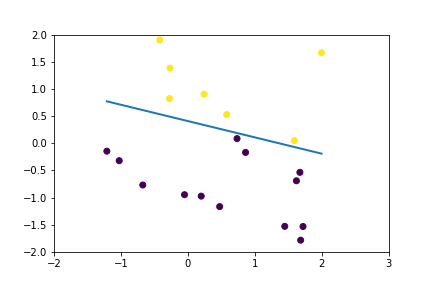

In [43]:
%matplotlib nbagg
 
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 3), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = array_1[:,0]
x2 = array_1[:,1]
y = array_1[:,2]
w = weights_list_1

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1),max(x1)]
    y1 = - ( (weights_list_1[i,0] + weights_list_1[i,1] * min(x1)) / weights_list_1[i,2])
    y2 = - ( (weights_list_1[i,0] + weights_list_1[i,1] * max(x1)) / weights_list_1[i,2])
    y = [y1, y2]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights_list_1), interval=700, blit=True, repeat=False)


plt.show()


<IPython.core.display.Javascript object>


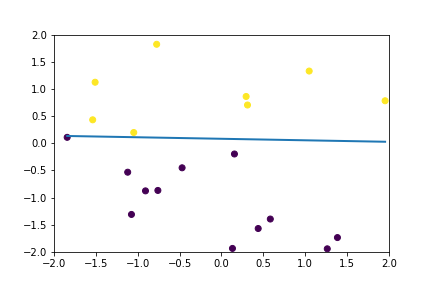

In [44]:
%matplotlib nbagg
 
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = array_4[:,0]
x2 = array_4[:,1]
y = array_4[:,2]
w = weights_list_4

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1) ,max(x1)]
    y1 = - ( (weights_list_4[i,0] + weights_list_4[i,1] * min(x1)) / weights_list_4[i,2])
    y2 = - ( (weights_list_4[i,0] + weights_list_4[i,1] * max(x1)) / weights_list_4[i,2])
    y = [y1, y2]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights_list_4), interval=700, blit=True, repeat=False)


plt.show()
